In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

In [71]:
data_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=';')

In [72]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


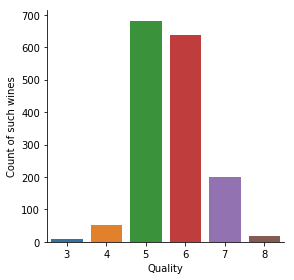

In [73]:
import seaborn as sns
sns.factorplot(
    x='quality', 
    data=data, 
    kind='count'
).set_axis_labels('Quality', 'Count of such wines');

## Seperating label and features

In [74]:
y = data.quality
X = data.drop('quality', axis=1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
X_train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3
1446,6.9,0.630,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8
1318,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8
574,10.6,0.340,0.49,3.2,0.078,20.0,78.0,0.99920,3.19,0.70,10.0
123,8.0,0.710,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1
935,8.8,0.300,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8
1424,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6
223,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.0
666,8.3,0.490,0.36,1.8,0.222,6.0,16.0,0.99800,3.18,0.60,9.5


## Normalizing the data 

In [83]:
X_train_scaled = preprocessing.scale(X_train)

print (X_train_scaled)

[[-0.92444669 -0.59945134  0.01232798 ... -0.95480742 -0.5281843
   0.81200666]
 [-0.80843078  0.55864518 -1.27451965 ...  0.58564122  0.55265367
  -0.58534465]
 [-0.46038306  0.55864518  0.01232798 ... -0.31295382 -0.46813774
  -0.58534465]
 ...
 [ 0.75778398 -1.09577842  1.2991756  ...  0.32889978  0.61270023
   1.83673095]
 [-0.63440692  0.39320282 -1.17157184 ...  1.4200509  -0.64827741
  -0.86481491]
 [ 0.29372035 -1.20607332  0.68148874 ...  0.00797298  0.79283989
   1.27779043]]


# Using decision tree for the classification

In [84]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
y_pred = clf.predict(X_test)
y_pred

array([5, 7, 7, 5, 7, 6, 5, 5, 6, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 8, 8, 5, 6, 6, 5, 6, 6, 5, 5, 5, 7, 5, 7, 6, 5, 5, 6, 6, 4,
       5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 4, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 4, 5, 6, 7, 3, 6, 7, 7,
       7, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5, 7, 6, 7, 6, 5, 6, 5,
       7, 6, 7, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       7, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 5,
       5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 7, 7, 6, 6, 6, 7, 5, 8, 5, 6, 6, 6, 6, 7, 6, 7, 5, 6, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6,
       5, 6, 7, 6, 5, 5, 6, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 7, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 5,
       6, 7, 5, 5, 7, 6, 6, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5,
       7, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6,

In [86]:
expected_y=np.transpose(list(y_test))

In [87]:
ct=0
for i in range(len(y_test)):
    if(y_pred[i]==expected_y[i]):
        ct=ct+1
print ("Accuracy of the used model is " + str((ct/len(y_test))*100) + " %")

Accuracy of the used model is 62.5 %
